## 단순 선형 회귀

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')

df

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


- 아버지와 아들의 키만 발췌

In [43]:
df=df[df.Gender == 'M']
df=df[['Father','Height']]


In [44]:
df.rename(columns={'Height': 'Son'},inplace= True)

In [45]:
df= df*2.54

In [46]:
df

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


- 산점도 그리기

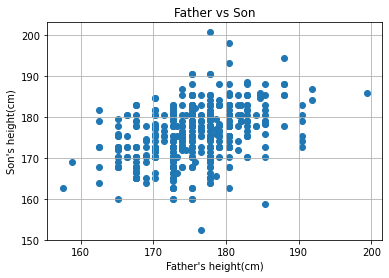

In [50]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기:Numpy polyfit

In [53]:
fp1 = np.polyfit(df.Father, df.Son,1)       #1차식으로 아버지와 아들의 키 관계
fp1                                         #기울기 , 절편

array([ 0.44774792, 97.17763701])

In [73]:
x=np.array([156,201])
y=fp1[0]*x+fp1[1]
y


array([167.02631215, 187.17496845])

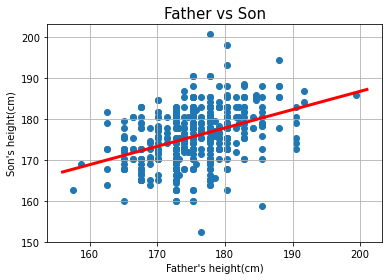

In [58]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.plot([156,201],[156*fp1[0]+fp1[1], 201*fp1[0]+fp1[1]],'r-',lw=3)
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression

In [71]:
# X의 shape 1차원 --> 2차원이상으로 바꿔주어야함
df.Father.values.shape

(465,)

In [70]:
lr= LinearRegression()
lr.fit(df.Father.values.reshape(-1,1),df.Son.values)

LinearRegression()

In [72]:
# 기울기
lr.coef_

array([0.44774792])

In [74]:
#절편
lr.intercept_

97.17763700739346

In [75]:
#잔차 제곱의 합(Rss : Residual Sum of Square)
lr._residues

17556.59951549399

In [76]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1),df.Son.values)

0.15312927478306992

In [ ]:
from sklearn.metrics import r2_score
# r2_score = R squared 